In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from GeoConformalizedExplainer import GeoConformalizedExplainer

/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
data = pd.read_csv('../data/nyc_income.csv')

In [3]:
data

UNEMP_RATE  cartodb_id  withssi  withsocial  withpubass  struggling  \
0       0.000000           1        0           0           0           0   
1       0.081705           2      228         353          47         694   
2       0.170603           3      658        1577         198        2589   
3       0.000000           4        0           0           0           0   
4       0.088037           5      736        1382         194        2953   
...          ...         ...      ...         ...         ...         ...   
2161    0.092720        2162      155         376          85         947   
2162    0.132520        2163       88         186          86         846   
2163    0.075558        2164      178         256         263         919   
2164    0.051793        2165       15         144          19         289   
2165    0.000000        2166        0           0           0           0   

      profession  popunemplo  poptot  popover18  ...    shape_leng  \
0              0           0       0          0  ...  11023.047911   
1              0          92    2773       2351  ...   4748.703641   
2             36         549    8339       6878  ...   8568.208357   
3              0           0       0          0  ...  32407.899284   
4             19         379   10760       8867  ...   6973.204078   
...          ...         ...     ...        ...  ...           ...   
2161          55         284    6444       4780  ...  13923.143577   
2162           0         163    3124       1949  ...   8255.052315   
2163           6         132    4296       2855  ...  18063.518237   
2164           0          26    1095        833  ...  37832.003531   
2165           0           0       0          0  ...   4743.128085   

        shape_area  ct2010  boroct2010  borocode  tractid       popdty  \
0     1.844421e+06     100     1000100         1     1.00       0.0000   
1     9.716282e+05     201     1000201         1     2.01   79619.0500   
2     3.315121e+06     202     1000202         1     2.02   72326.4600   
3     9.081808e+06     500     1000500         1     5.00       0.0000   
4     2.583270e+06     600     1000600         1     6.00  109785.0000   
...            ...     ...         ...       ...      ...          ...   
2161  9.788329e+06   30302     5030302         5   303.02   18294.7700   
2162  4.126572e+06   31901     5031901         5   319.01   20850.7200   
2163  7.018116e+06   31902     5031902         5   319.02   16113.0400   
2164  4.120270e+07   32300     5032300         5   323.00     734.6357   
2165  6.357020e+05  990100     5990100         5  9901.00       0.0000   

          geo_fips        lat        lon  
0     3.606140e+20 -74.042338  40.695677  
1     3.606140e+20 -73.985847  40.711867  
2     3.606140e+20 -73.981325  40.712140  
3     3.606140e+20 -74.016953  40.688950  
4     3.606140e+20 -73.989476  40.711952  
...            ...        ...        ...  
2161  3.608570e+20 -74.158738  40.623528  
2162  3.608570e+20 -74.163326  40.630260  
2163  3.608570e+20 -74.165732  40.637851  
2164  3.608570e+20 -74.178533  40.633960  
2165  3.608570e+20 -74.053141  40.576240  

[2166 rows x 115 columns]

In [4]:
middle_income = data['medianinco']

In [5]:
middle_income = middle_income.dropna()

In [6]:
middle_income.shape

(2112,)

In [7]:
features = data[['UNEMP_RATE', 'withssi', 'withpubass', 'profession', 'popover18', 'popinlabou',
                 'poor', 'pacific', 'otherethni', 'mixed', 'master', 'maleunempl', 'maleover18',
                 'maleinlabo', 'maledrop', 'male16to19', 'male', 'hispanic', 'highschool',
                 'femaleunem', 'femaleover', 'femaleinla', 'femaledrop', 'femal16_19', 'female',
                 'europeanun', 'europeanin', 'european', 'doctorate', 'college', 'bachelor',
                 'asian', 'american', 'african', 'popdty']]

In [8]:
features = features.iloc[middle_income.index, :]

In [9]:
features.shape

(2112, 35)

In [10]:
loc = data[['lon', 'lat']]

In [11]:
loc = loc.iloc[middle_income.index, :]

In [12]:
X_train, X_temp, y_train, y_temp, loc_train, loc_temp = train_test_split(features, middle_income, loc, train_size=0.8, random_state=42)

In [13]:
X_calib, X_test, y_calib, y_test, loc_calib, loc_test = train_test_split(X_temp, y_temp, loc_temp, train_size=0.5, random_state=42)

In [14]:
model = xgb.XGBRegressor(n_estimators=500, max_depth=3, min_child_weight=1.0, colsample_bytree=1.0)

In [15]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
model.score(X_test, y_test)

0.6692060778494837

In [17]:
explainer = GeoConformalizedExplainer(model, X_train, X_calib, loc_calib.values, loc_test.values, 0.1, 0.15)

In [18]:
results = explainer.uncertainty_aware_explain(x_test=X_test)

 11%|█▏        | 4/35 [00:20<00:00, 37.38it/s]/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:34:52] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)
 23%|██▎       | 8/35 [03:04<12:13, 27.17s/it]/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:34:53] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:34:55] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" 

(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)

/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:57:16] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)

/opt/anaconda3/envs/UncertaintyGeoXAI/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:57:17] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)

/Users/louxiayin/Academy/Research/UncertaintyGeoXAI/GeoConformalizedExplainer/GeoConformalizedExplainer.py:138: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature_name}_geo_uncertainty'] = geocp_result.geo_uncertainty
/Users/louxiayin/Academy/Research/UncertaintyGeoXAI/GeoConformalizedExplainer/GeoConformalizedExplainer.py:139: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature_name}_uncertainty'] = geocp_result.uncertainty
/Users/louxiayin/Academy/Research/UncertaintyGeoXAI/GeoConformalizedExplainer/GeoConform

(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)
(211,)

In [19]:
results.accuracy_summary()

coverage_probability        R2         RMSE      SHAP_Var  \
UNEMP_RATE              0.863208  0.868143   586.440186  2.608221e+06   
withssi                 0.891509  0.971063   758.790405  1.989701e+07   
withpubass              0.839623  0.948725   451.118774  3.968943e+06   
profession              0.886792  0.985174   749.568604  3.789555e+07   
popover18               0.886792  0.875622   641.449402  3.308122e+06   
popinlabou              0.872642  0.910380   465.895447  2.421989e+06   
poor                    0.882075  0.990493  1149.221191  1.389134e+08   
pacific                 0.943396  0.824272    87.509262  4.357784e+04   
otherethni              0.910377  0.904269   659.422852  4.542300e+06   
mixed                   0.882075  0.812886   381.447113  7.776108e+05   
master                  0.867925  0.918312  1382.606445  2.340124e+07   
maleunempl              0.863208  0.845829   490.150879  1.558320e+06   
maleover18              0.797170  0.902274   266.323395  7.257872e+05   
maleinlabo              0.943396  0.975560   539.852661  1.192489e+07   
maledrop                0.896226  0.846387   132.297394  1.139392e+05   
male16to19              0.929245  0.777673   321.906982  4.660897e+05   
male                    0.900943  0.894094   283.764954  7.603192e+05   
hispanic                0.853774  0.766824   390.889771  6.552771e+05   
highschool              0.834906  0.951512   945.864441  1.845115e+07   
femaleunem              0.924528  0.661889   564.902527  9.438168e+05   
femaleover              0.919811  0.966357   301.759430  2.706633e+06   
femaleinla              0.948113  0.930376   445.471283  2.850225e+06   
femaledrop              0.943396  0.829885    96.718994  5.498953e+04   
femal16_19              0.830189  0.891435   696.674988  4.470635e+06   
female                  0.905660  0.941322   359.893433  2.207372e+06   
europeanun              0.853774  0.519945   313.800903  2.051243e+05   
europeanin              0.849057  0.954180   591.936462  7.647034e+06   
european                0.844340  0.905106   256.857727  6.952584e+05   
doctorate               0.915094  0.893567   554.152466  2.885250e+06   
college                 0.948113  0.906523   440.543671  2.076225e+06   
bachelor                0.844340  0.852781   745.926208  3.779444e+06   
asian                   0.886792  0.359214   637.099182  6.334337e+05   
american                0.919811  0.654494   217.571625  1.370088e+05   
african                 0.905660  0.887430   536.579895  2.557668e+06   
popdty                  0.891509  0.964821   655.975830  1.223170e+07   

            Pred_SHAP_Var  
UNEMP_RATE   2.002761e+06  
withssi      1.803182e+07  
withpubass   3.714500e+06  
profession   3.743082e+07  
popover18    4.492330e+06  
popinlabou   2.175963e+06  
poor         1.373773e+08  
pacific      6.032381e+04  
otherethni   4.204422e+06  
mixed        6.302536e+05  
master       2.541288e+07  
maleunempl   1.054189e+06  
maleover18   6.723640e+05  
maleinlabo   1.202066e+07  
maledrop     8.404179e+04  
male16to19   3.509802e+05  
male         6.190375e+05  
hispanic     5.742779e+05  
highschool   1.484529e+07  
femaleunem   4.324982e+05  
femaleover   2.593343e+06  
femaleinla   2.595023e+06  
femaledrop   4.246030e+04  
femal16_19   3.557808e+06  
female       1.832023e+06  
europeanun   1.110697e+05  
europeanin   7.193407e+06  
european     6.834568e+05  
doctorate    2.262182e+06  
college      1.635557e+06  
bachelor     4.505634e+06  
asian        6.092916e+05  
american     8.661223e+04  
african      2.140479e+06  
popdty       1.143001e+07

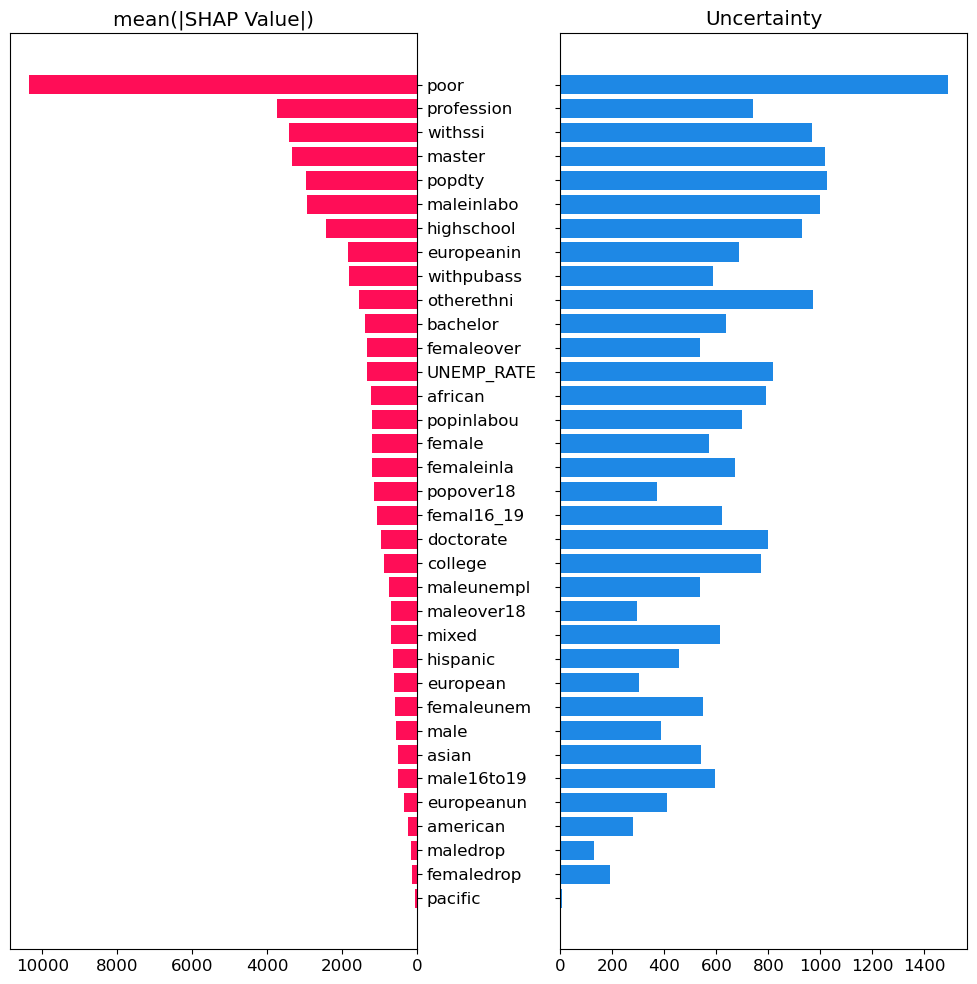

In [20]:
results.plot_absolute_shap_value_with_uncertainty()

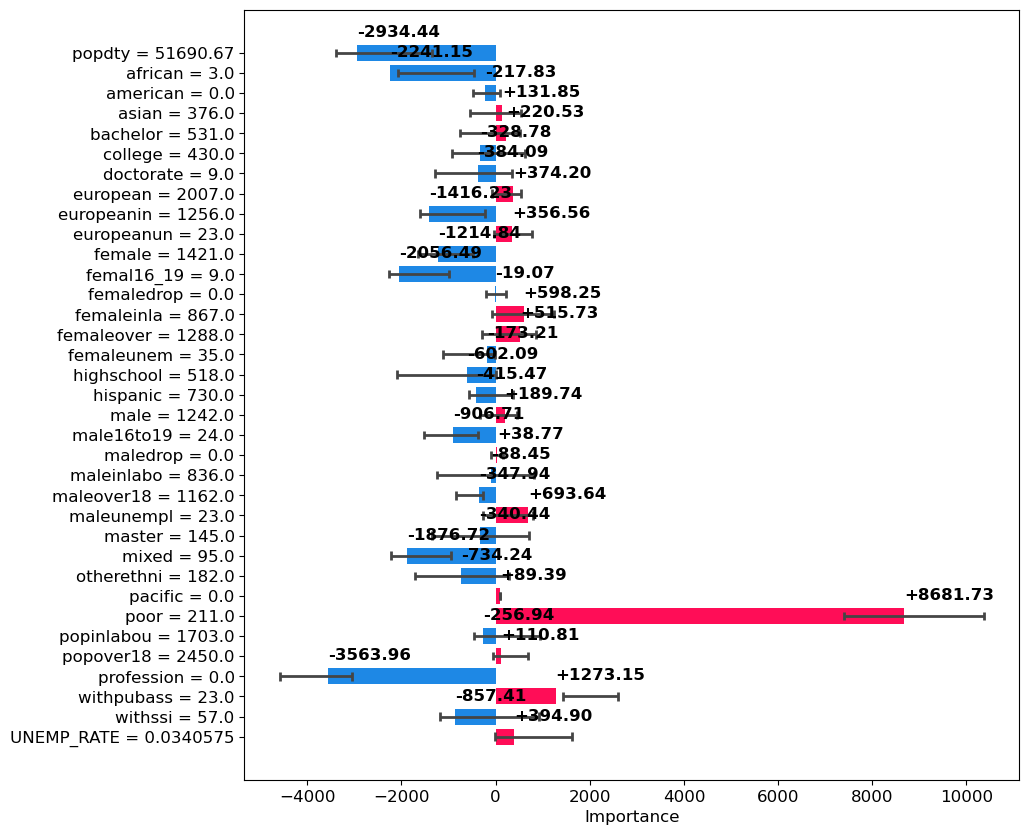

In [21]:
results.plot_shap_values_with_uncertainty(10)

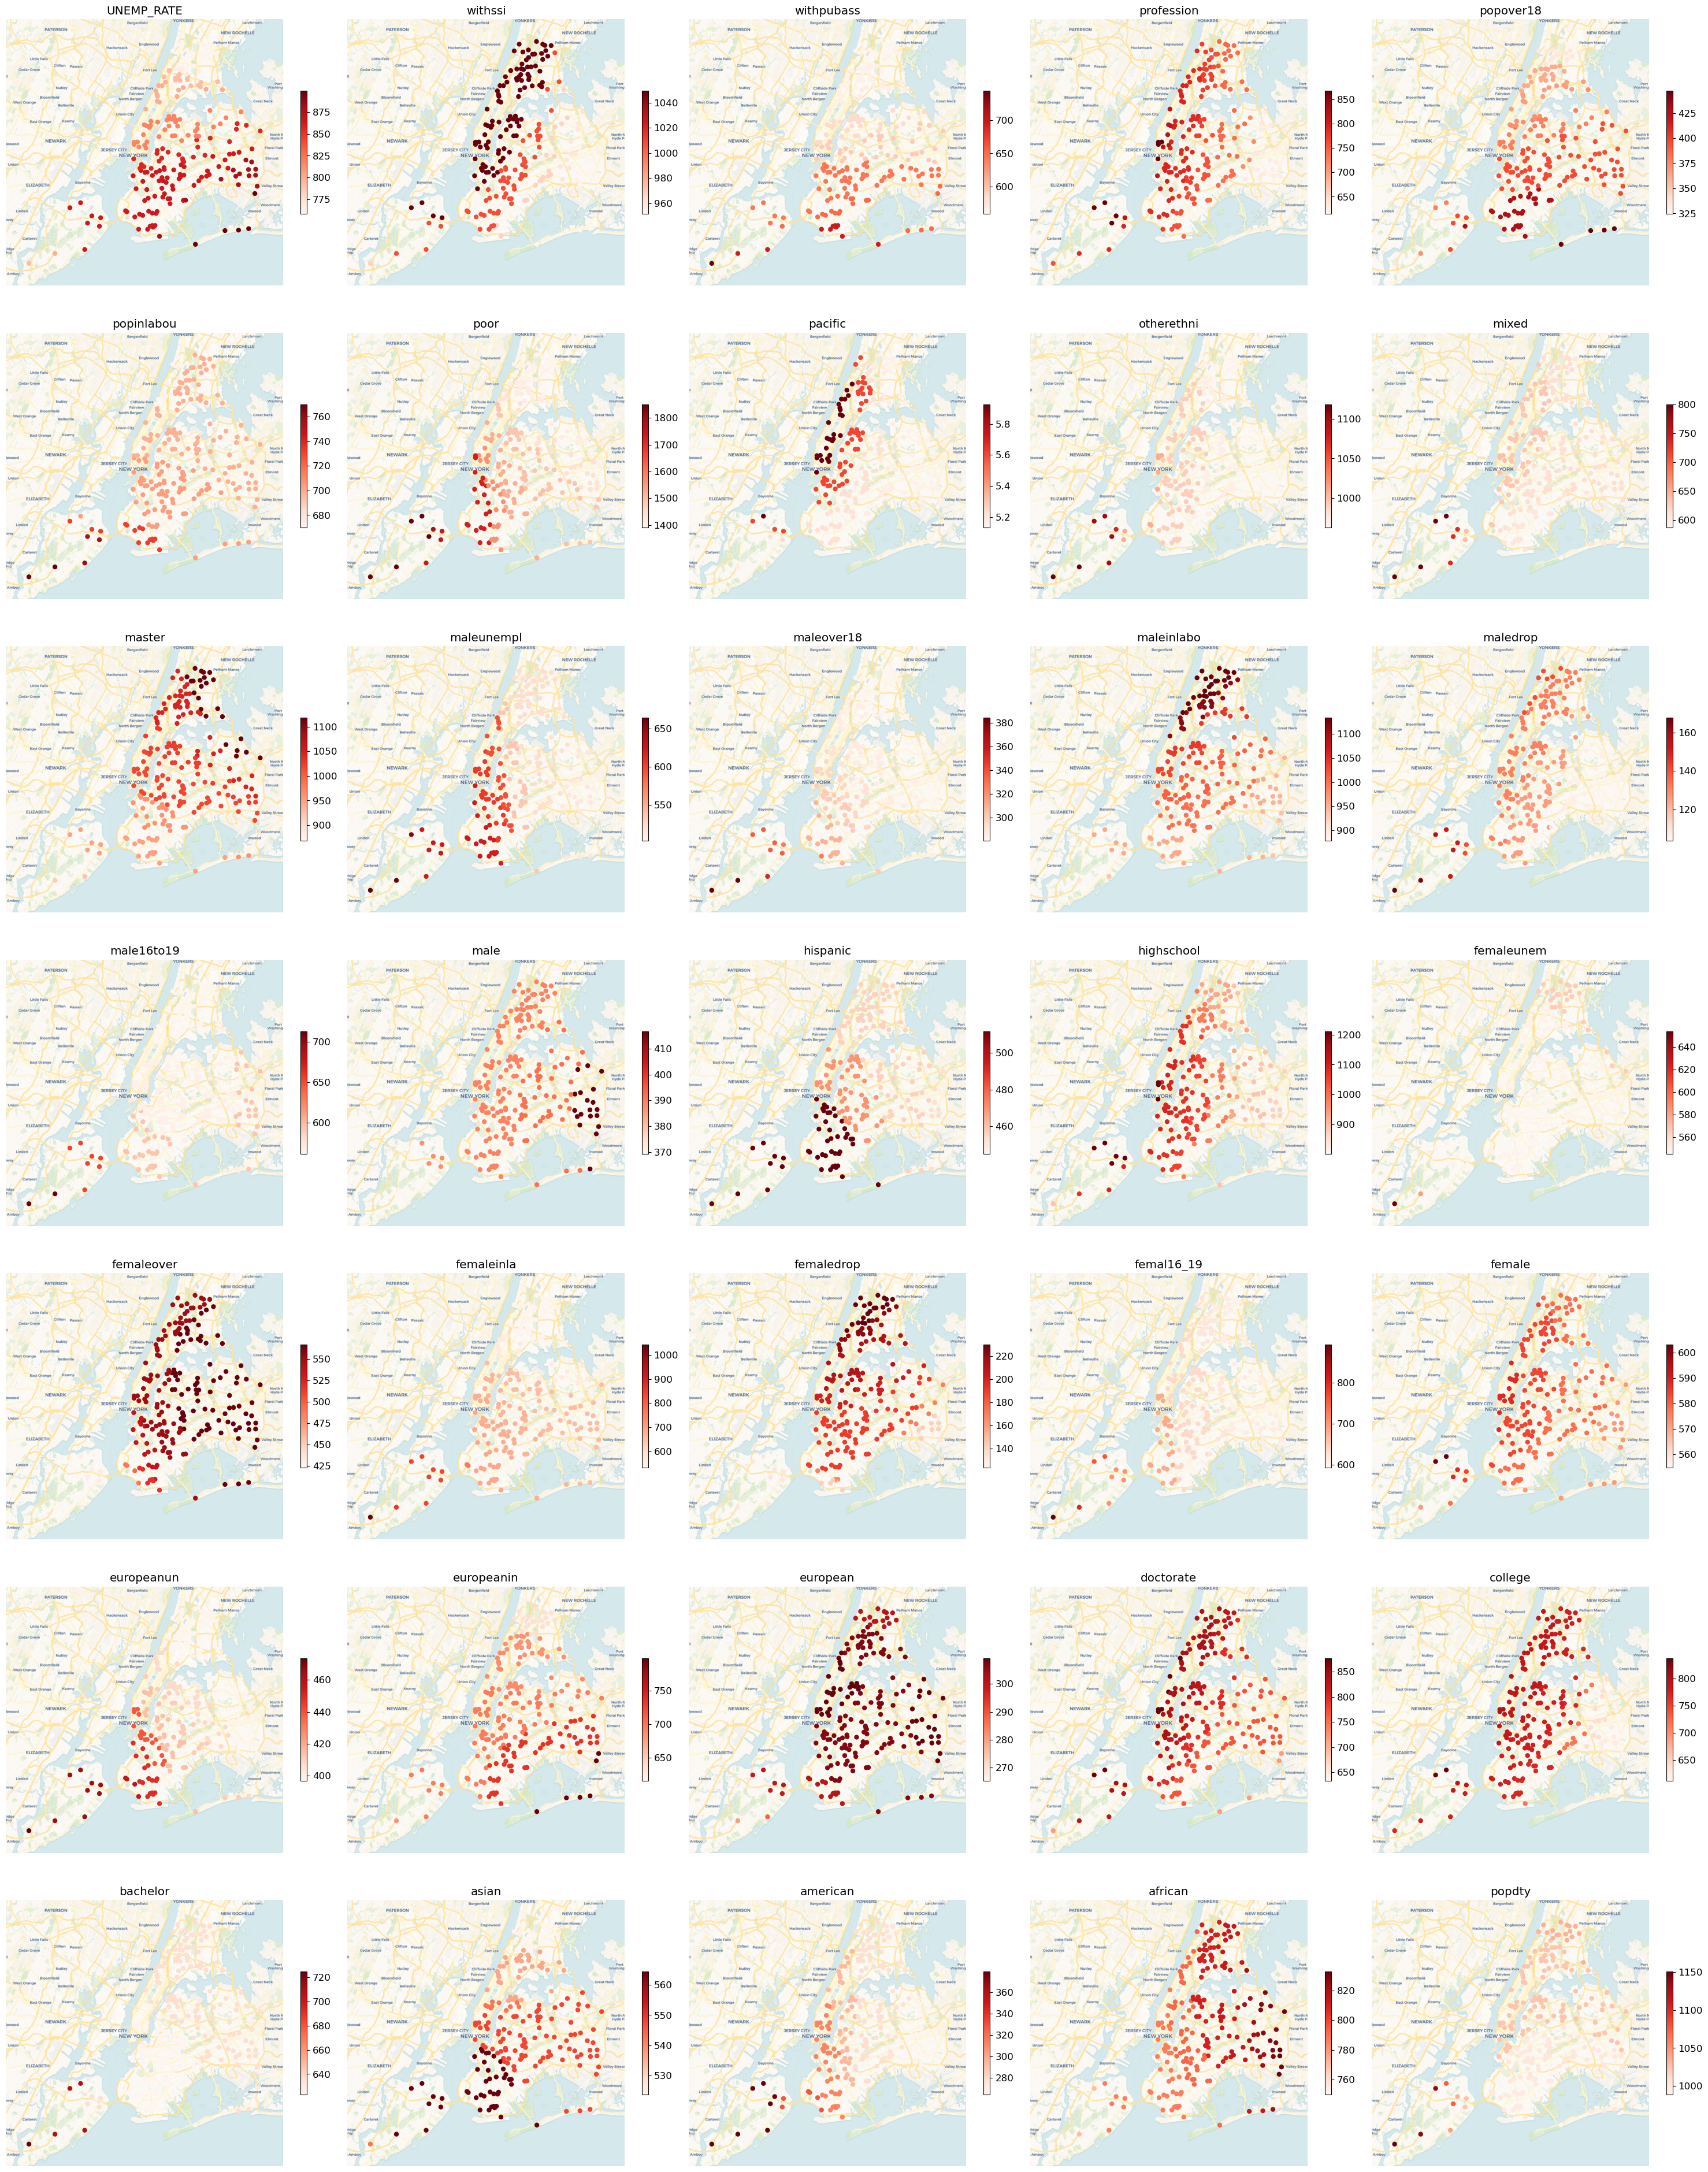

In [22]:
results.plot_geo_uncertainty(figsize=[30, 40], shrink=0.3)

100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00

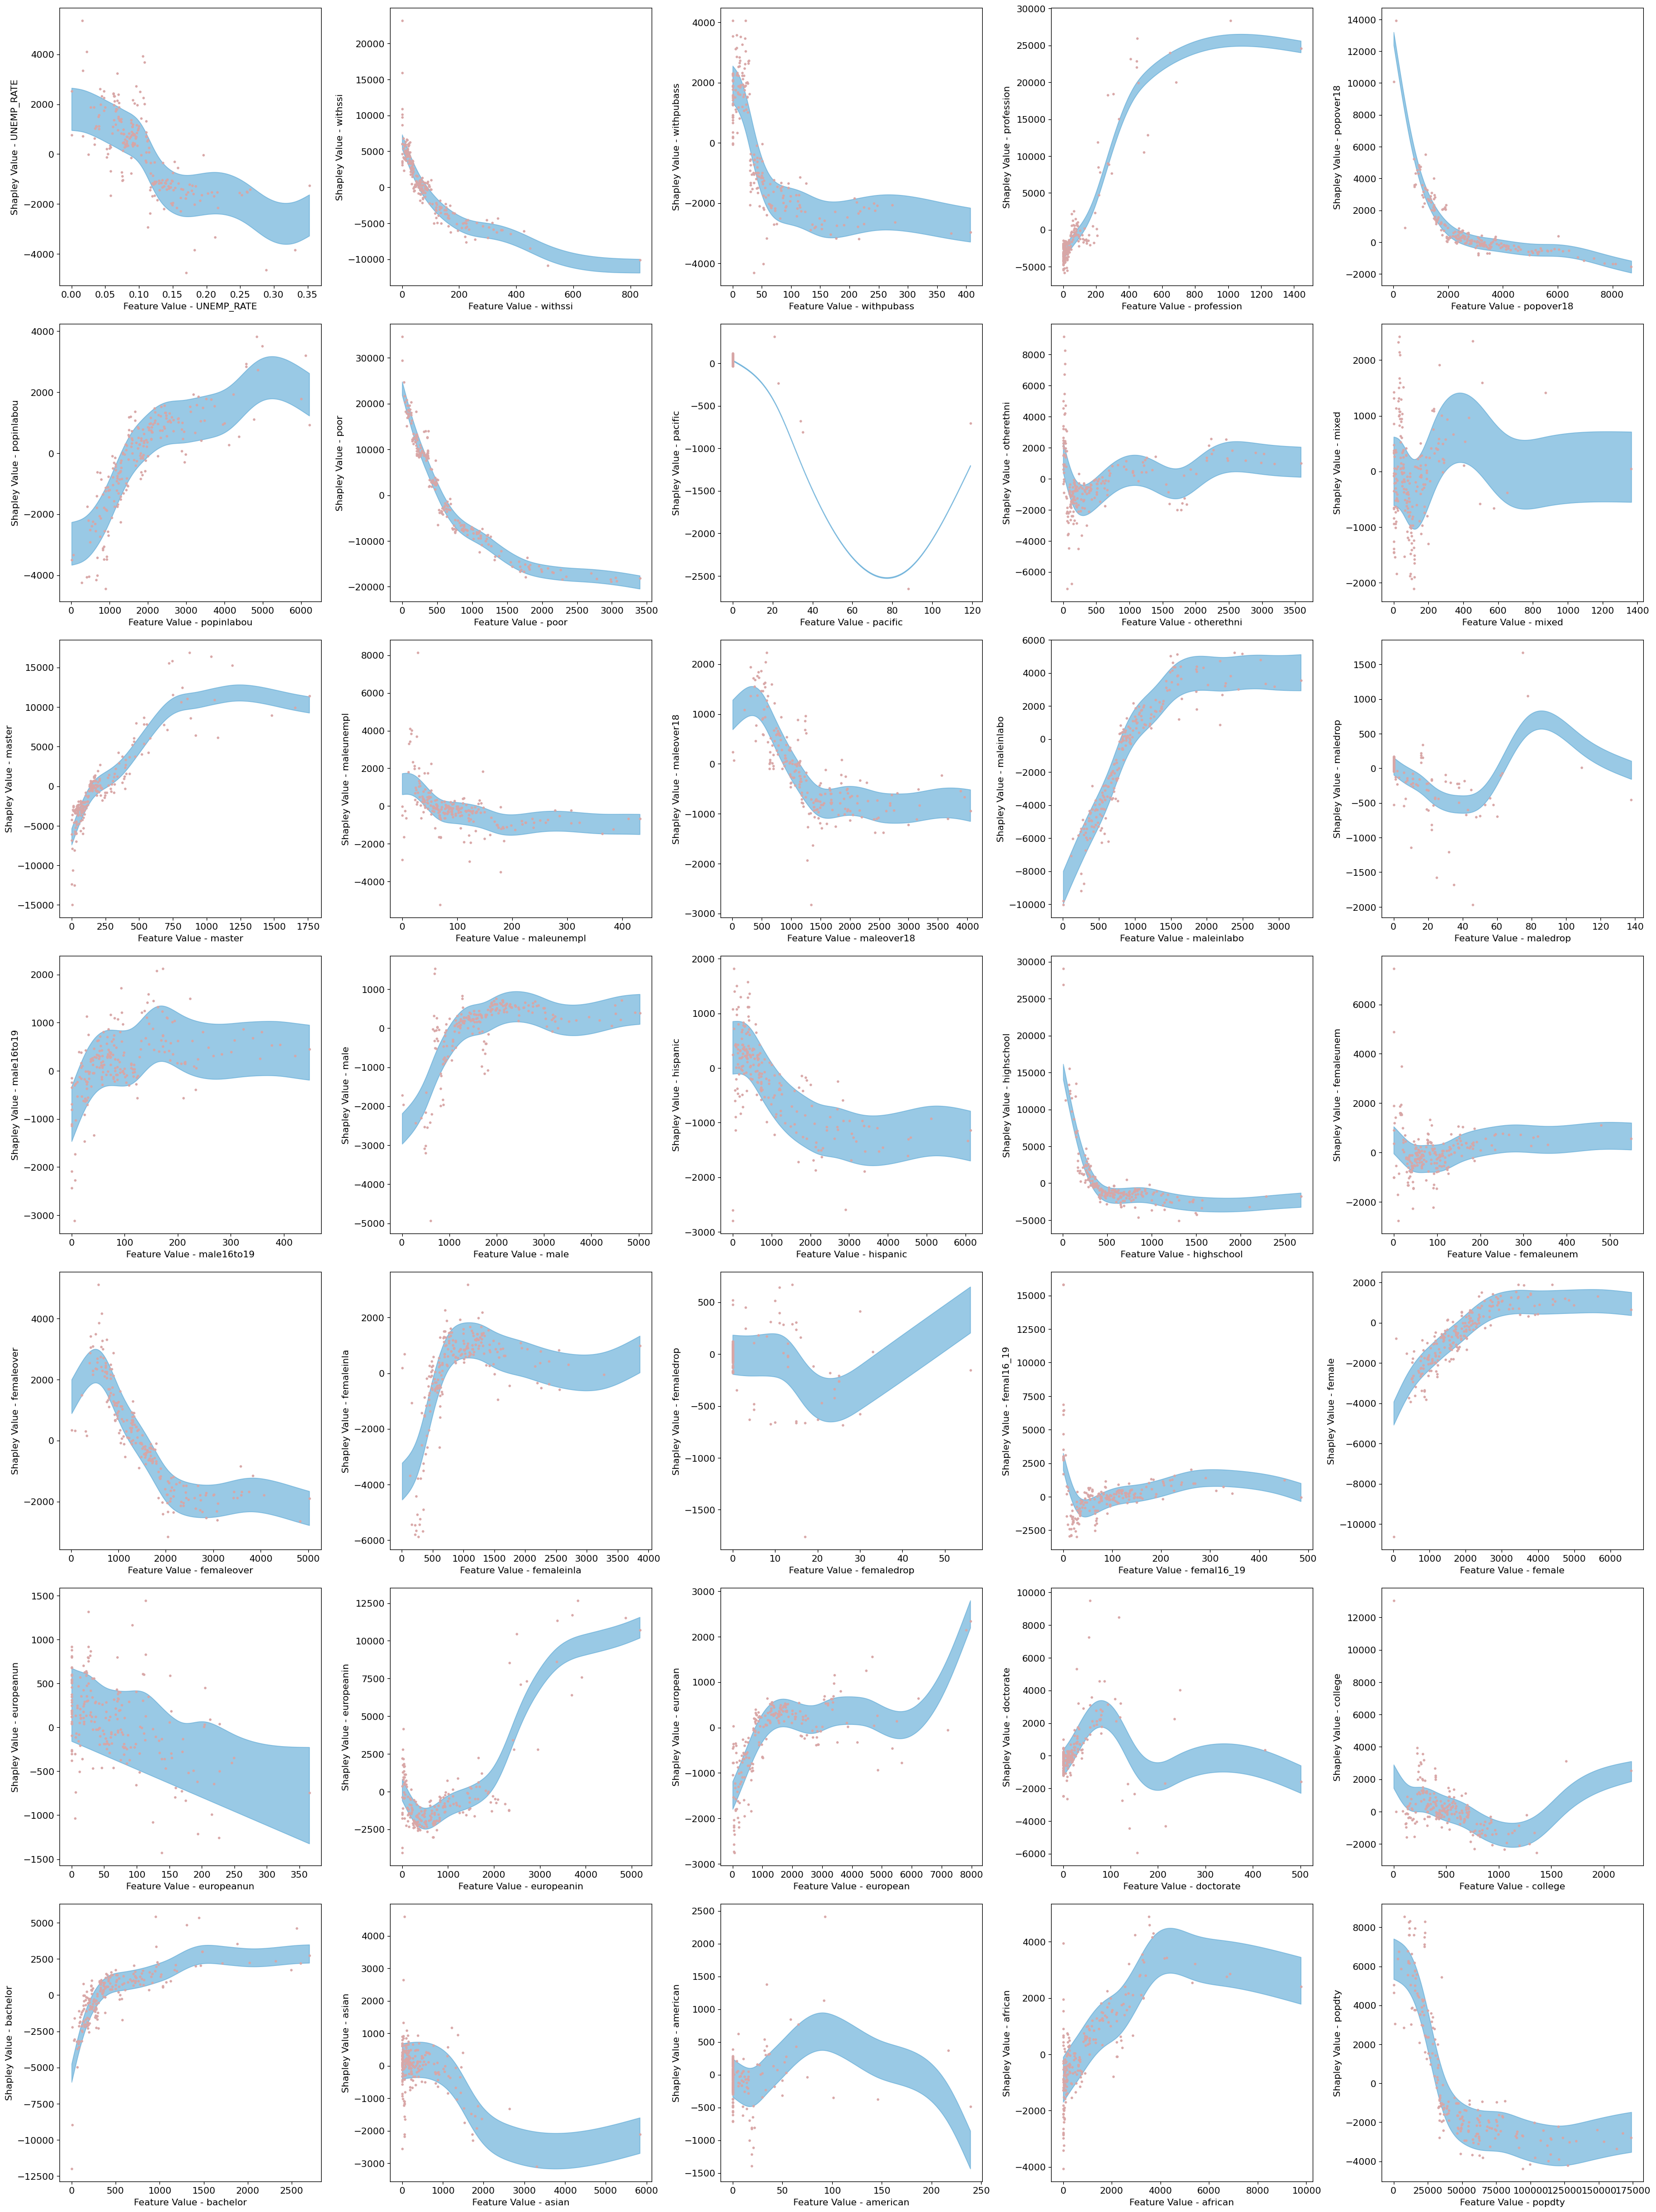

In [23]:
results.plot_partial_dependence_with_fitted_bounds(figsize=[30, 40])